In [33]:
# 데이터처리
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display, HTML
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import scipy as sp
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
##### Data Load
dat_dir = 'C:/kdev/pythonCode/day2/'
dat = pd.read_csv(dat_dir+'Regression_2_ToyotaCorolla.csv')
display(HTML(dat.to_html()))


In [35]:
##### Data Preprocessing
# split x variable to y variable
x,y = dat.drop(['Id', 'Model', 'Price'], axis=1), dat['Price']

In [36]:
X = pd.DataFrame(x)

In [37]:
X

Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  \
0            23         10      2002  46986    Diesel   90          1   
1            23         10      2002  72937    Diesel   90          1   
2            24          9      2002  41711    Diesel   90          1   
3            26          7      2002  48000    Diesel   90          0   
4            30          3      2002  38500    Diesel   90          0   
5            32          1      2002  61000    Diesel   90          0   
6            27          6      2002  94612    Diesel   90          1   
7            30          3      2002  75889    Diesel   90          1   
8            27          6      2002  19700    Petrol  192          0   
9            23         10      2002  71138    Diesel   69          0   
10           25          8      2002  31461    Petrol  192          0   
11           22         11      2002  43610    Petrol  192          0   
12           25          8      2002  32189    Petrol  192          0   
13           31          2      2002  23000    Petrol  192          1   
14           32          1      2002  34131    Petrol  192          1   
15           28          5      2002  18739    Petrol  192          0   
16           30          3      2002  34000    Petrol  192          1   
17           24          9      2002  21716    Petrol  110          1   
18           24          9      2002  25563    Petrol  110          0   
19           30          3      2002  64359    Petrol  110          1   
20           30          3      2002  67660    Petrol  110          1   
21           29          4      2002  43905    Petrol  110          0   
22           28          5      2002  56349    Petrol  110          1   
23           28          5      2002  32220    Petrol  110          1   
24           29          4      2002  25813    Petrol  110          1   
25           25          8      2002  28450    Petrol  110          1   
26           27          6      2002  34545    Petrol  110          1   
27           29          4      2002  41415    Petrol  110          1   
28           28          5      2002  44142    Petrol  110          0   
29           30          3      2002  11090    Petrol  110          1   
...         ...        ...       ...    ...       ...  ...        ...   
1406         70         11      1998  44850    Petrol  110          1   
1407         69         12      1998  44826    Petrol  110          0   
1408         80          1      1998  44444    Petrol  110          1   
1409         75          6      1998  43720    Petrol  110          1   
1410         78          3      1998  43622    Petrol   86          1   
1411         76          5      1998  43532    Petrol  110          0   
1412         69         12      1998  42800    Petrol  110          1   
1413         74          7      1998  42317    Petrol  107          1   
1414         80          1      1998  42186    Petrol  110          1   
1415         72          9      1998  42000    Petrol  110          1   
1416         79          2      1998  40093    Petrol  110          0   
1417         79          2      1998  39800    Petrol  107          0   
1418         73          8      1998  39168    Petrol   86          0   
1419         75          6      1998  38945    Petrol  110          1   
1420         76          5      1998  36537    Petrol  110          0   
1421         78          3      1998  36000    Petrol   86          0   
1422         78          3      1998  36000    Petrol  110          1   
1423         80          1      1998  35821    Petrol   86          0   
1424         73          8      1998  34717    Petrol   86          0   
1425         80          1      1998  34000    Petrol   86          1   
1426         78          3      1998  30964    Petrol  110          0   
1427         71         10      1998  29000    Petrol   86          1   
1428         72          9      1998  26000    Petrol   86      

In [38]:
##### Preprocessing
X_categorical = X['Fuel_Type']

In [39]:
dummies = pd.get_dummies(X_categorical)
dummies

CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
5       0       1       0
6       0       1       0
7       0       1       0
8       0       0       1
9       0       1       0
10      0       0       1
11      0       0       1
12      0       0       1
13      0       0       1
14      0       0       1
15      0       0       1
16      0       0       1
17      0       0       1
18      0       0       1
19      0       0       1
20      0       0       1
21      0       0       1
22      0       0       1
23      0       0       1
24      0       0       1
25      0       0       1
26      0       0       1
27      0       0       1
28      0       0       1
29      0       0       1
...   ...     ...     ...
1406    0       0       1
1407    0       0       1
1408    0       0       1
1409    0       0       1
1410    0       0       1
1411    0       0       1
1412    0       0       1
1413    0       0       1
1414    0       0       1
1415    0       0       1
1416    0       0       1
1417    0       0       1
1418    0       0       1
1419    0       0       1
1420    0       0       1
1421    0       0       1
1422    0       0       1
1423    0       0       1
1424    0       0       1
1425    0       0       1
1426    0       0       1
1427    0       0       1
1428    0       0       1
1429    0       0       1
1430    0       0       1
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       1
1435    0       0       1

[1436 rows x 3 columns]

In [40]:
X_numeric = X.drop('Fuel_Type', axis=1)

In [41]:
X_processing = pd.concat((dummies,X_numeric), axis = 1)
X_processing

CNG  Diesel  Petrol  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  \
0       0       1       0         23         10      2002  46986   90   
1       0       1       0         23         10      2002  72937   90   
2       0       1       0         24          9      2002  41711   90   
3       0       1       0         26          7      2002  48000   90   
4       0       1       0         30          3      2002  38500   90   
5       0       1       0         32          1      2002  61000   90   
6       0       1       0         27          6      2002  94612   90   
7       0       1       0         30          3      2002  75889   90   
8       0       0       1         27          6      2002  19700  192   
9       0       1       0         23         10      2002  71138   69   
10      0       0       1         25          8      2002  31461  192   
11      0       0       1         22         11      2002  43610  192   
12      0       0       1         25          8      2002  32189  192   
13      0       0       1         31          2      2002  23000  192   
14      0       0       1         32          1      2002  34131  192   
15      0       0       1         28          5      2002  18739  192   
16      0       0       1         30          3      2002  34000  192   
17      0       0       1         24          9      2002  21716  110   
18      0       0       1         24          9      2002  25563  110   
19      0       0       1         30          3      2002  64359  110   
20      0       0       1         30          3      2002  67660  110   
21      0       0       1         29          4      2002  43905  110   
22      0       0       1         28          5      2002  56349  110   
23      0       0       1         28          5      2002  32220  110   
24      0       0       1         29          4      2002  25813  110   
25      0       0       1         25          8      2002  28450  110   
26      0       0       1         27          6      2002  34545  110   
27      0       0       1         29          4      2002  41415  110   
28      0       0       1         28          5      2002  44142  110   
29      0       0       1         30          3      2002  11090  110   
...   ...     ...     ...        ...        ...       ...    ...  ...   
1406    0       0       1         70         11      1998  44850  110   
1407    0       0       1         69         12      1998  44826  110   
1408    0       0       1         80          1      1998  44444  110   
1409    0       0       1         75          6      1998  43720  110   
1410    0       0       1         78          3      1998  43622   86   
1411    0       0       1         76          5      1998  43532  110   
1412    0       0       1         69         12      1998  42800  110   
1413    0       0       1         74          7      1998  42317  107   
1414    0       0       1         80          1      1998  42186  110   
1415    0       0       1         72          9      1998  42000  110   
1416    0       0       1         79          2      1998  40093  110   
1417    0       0       1         79          2      1998  39800  107   
1418    0       0       1         73          8      1998  39168   86   
1419    0       0       1         75          6      1998  38945  110   
1420    0       0       1         76          5      1998  36537  110   
1421    0       0       1         78          3      1998  36000   86   
1422    0       0       1         78          3      1998  36000  110   
1423    0       0       1         80          1      1998  35821   86   
1424    0       0       1         73          8      1998  34717   86   
1425    0       0       1         80          1      1998  34000   86   
1426    0       0       1         78          3      1998  30964  110   
1427    0       0       1         71         10      1998  29000   86   
1428    0       0       1         72          9      1998  26000

In [42]:
X_processed = preprocessing.minmax_scale(X_processing)
X_processed = pd.DataFrame(X_processed)
X_processed.columns = X_processing.columns
X_processed

CNG  Diesel  Petrol  Age_08_04  Mfg_Month  Mfg_Year        KM        HP  \
0     0.0     1.0     0.0   0.278481   0.818182  0.666667  0.193355  0.170732   
1     0.0     1.0     0.0   0.278481   0.818182  0.666667  0.300149  0.170732   
2     0.0     1.0     0.0   0.291139   0.727273  0.666667  0.171647  0.170732   
3     0.0     1.0     0.0   0.316456   0.545455  0.666667  0.197528  0.170732   
4     0.0     1.0     0.0   0.367089   0.181818  0.666667  0.158433  0.170732   
5     0.0     1.0     0.0   0.392405   0.000000  0.666667  0.251026  0.170732   
6     0.0     1.0     0.0   0.329114   0.454545  0.666667  0.389347  0.170732   
7     0.0     1.0     0.0   0.367089   0.181818  0.666667  0.312298  0.170732   
8     0.0     0.0     1.0   0.329114   0.454545  0.666667  0.081066  1.000000   
9     0.0     1.0     0.0   0.278481   0.818182  0.666667  0.292746  0.000000   
10    0.0     0.0     1.0   0.303797   0.636364  0.666667  0.129466  1.000000   
11    0.0     0.0     1.0   0.265823   0.909091  0.666667  0.179462  1.000000   
12    0.0     0.0     1.0   0.303797   0.636364  0.666667  0.132461  1.000000   
13    0.0     0.0     1.0   0.379747   0.090909  0.666667  0.094646  1.000000   
14    0.0     0.0     1.0   0.392405   0.000000  0.666667  0.140453  1.000000   
15    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.077111  1.000000   
16    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.139914  1.000000   
17    0.0     0.0     1.0   0.291139   0.727273  0.666667  0.089363  0.333333   
18    0.0     0.0     1.0   0.291139   0.727273  0.666667  0.105194  0.333333   
19    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.264849  0.333333   
20    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.278433  0.333333   
21    0.0     0.0     1.0   0.354430   0.272727  0.666667  0.180676  0.333333   
22    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.231886  0.333333   
23    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.132589  0.333333   
24    0.0     0.0     1.0   0.354430   0.272727  0.666667  0.106223  0.333333   
25    0.0     0.0     1.0   0.303797   0.636364  0.666667  0.117075  0.333333   
26    0.0     0.0     1.0   0.329114   0.454545  0.666667  0.142157  0.333333   
27    0.0     0.0     1.0   0.354430   0.272727  0.666667  0.170429  0.333333   
28    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.181651  0.333333   
29    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.045634  0.333333   
...   ...     ...     ...        ...        ...       ...       ...       ...   
1406  0.0     0.0     1.0   0.873418   0.909091  0.000000  0.184565  0.333333   
1407  0.0     0.0     1.0   0.860759   1.000000  0.000000  0.184466  0.333333   
1408  0.0     0.0     1.0   1.000000   0.000000  0.000000  0.182894  0.333333   
1409  0.0     0.0     1.0   0.936709   0.454545  0.000000  0.179914  0.333333   
1410  0.0     0.0     1.0   0.974684   0.181818  0.000000  0.179511  0.138211   
1411  0.0     0.0     1.0   0.949367   0.363636  0.000000  0.179141  0.333333   
1412  0.0     0.0     1.0   0.860759   1.000000  0.000000  0.176128  0.333333   
1413  0.0     0.0     1.0   0.924051   0.545455  0.000000  0.174141  0.308943   
1414  0.0     0.0     1.0   1.000000   0.000000  0.000000  0.173602  0.333333   
1415  0.0     0.0     1.0   0.898734   0.727273  0.000000  0.172836  0.333333   
1416  0.0     0.0     1.0   0.987342   0.090909  0.000000  0.164988  0.333333   
1417  0.0     0.0     1.0   0.987342   0.090909  0.000000  0.163783  0.308943   
1418  0.0     0.0     1.0   0.911392   0.636364  0.000000  0.161182  0.138211   
1419  0.0     0.0     1.0   0.936709   0.454545  0.000000  0.160264  0.333333   
1420  0.0     0.0     1.0   0.949367   0.363636  0.000000  0.150355  0.333333   
1421  0.0     0.0     1.0   0.974684   0.181818  0.000000  0.148145  0.138211   
1422  0.0     0.0     1.0   0.974684   0.181818  0.000000  0.148145  0.333333   
1423  0.0     0.0     1.0   1.000000 

In [43]:
# split train to test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1005, 36) (431, 36) (1005,) (431,)


In [44]:
# Training the Multivariate Linear Regression Model
lm = sm.OLS(y_train, X_train)
lm_trained = lm.fit()
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     279.8
Date:                Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:23:57   Log-Likelihood:                -8457.5
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     971   BIC:                         1.715e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CNG              -2.992e+14   2.57e+15     -0.117      0.907   -5.33e+15    4.73e+15
Diesel           -2.992e+14   2.57e+15     -0.117      0.907   -5.33e+15    4.73e+15
Petrol           -2.992e+14   2.57e+15     -0.117      0.907   -5.33e+15    4.73e+15
Age_08_04         2.992e+14   2.57e+15      0.117      0.907   -4.73e+15    5.33e+15
Mfg_Month         4.167e+13   3.57e+14      0.117      0.907   -6.59e+14    7.43e+14
Mfg_Year          2.727e+14   2.34e+15      0.117      0.907   -4.32e+15    4.86e+15
KM               -4026.2254    327.510    -12.293      0.000   -4668.934   -3383.517
HP                6697.7335    727.524      9.206      0.000    5270.034    8125.433
Met_Color           80.2237     80.260      1.000      0.318     -77.279     237.727
Automatic          557.3599    163.887      3.401      0.001     235.746     878.973
cc               -5.448e+04   8338.798     -6.533      0.000   -7.08e+04   -3.81e+04
Doors              220.3913    127.939      1.723      0.085     -30.677     471.459
Cylinders           -0.0915      0.784     -0.117      0.907      -1.630       1.447
Gears              102.1452    655.409      0.156      0.876   -1184.035    1388.326
Quarterly_Tax     3807.4676    516.744      7.368      0.000    2793.405    4821.531
Weight            4794.4267    772.629      6.205      0.000    3278.212    6310.641
Mfr_Guarantee      151.2397     79.472      1.903      0.057      -4.718     307.197
BOVAG_Guarantee    483.8799    133.693      3.619      0.000     221.520     746.240
Guarantee_Period  2390.5044    470.883      5.077      0.000    1466.440    3314.569
ABS               -376.1710    143.820     -2.616      0.009    -658.405     -93.937
Airbag_1           119.3316    299.671      0.398      0.691    -468.745     707.408
Airbag_2           -58.0609    145.946     -0.398      0.691    -344.467     228.345
Airco              239.0014     95.910      2.492      0.013      50.787     427.216
Automatic_airco   1991.0547    202.861      9.815      0.000    1592.958    2389.152
Boardcomputer     -308.0106    129.567     -2.377      0.018    -562.274     -53.747
CD_Player          183.0206    107.364      1.705      0.089     -27.672     393.714
Central_Lock      -129.1915    160.002     -0.807      0.420    -443.182     184.799
Powered_Windows    518.7431    159.862      3.245      0.001     205.029     832.457
Power_Steering     -86.5825    302.321     -0.286      0.775    -679.860     506.695
Radio              752.4918    809.482      0.930      0.353    -836.043    2341.027
Mistlamps           66.4101    115.832      0.573      0.567    -160.901     293.721
Sport_Model        319.4246     92.621      3.449      0.001     137.663     501.186
Backseat_Divider  -156.8550    139.031     -1.128      0.260    -429.692     115.982
Metallic_Rim       106.

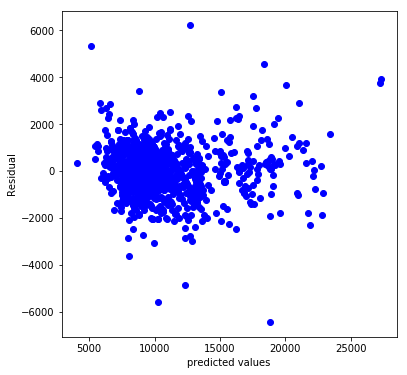

In [45]:
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.show()

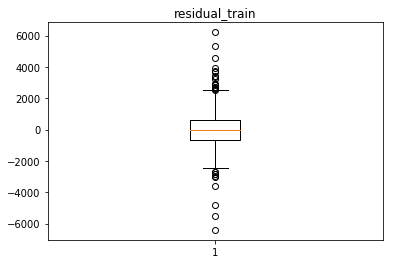

In [46]:
# Check the Model Assumption: residual by boxplot
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

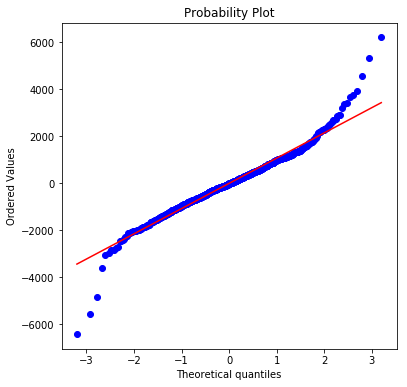

In [47]:
# Check the Model Assumption: normal distribution
plt.figure(figsize=(6,6))
stats.probplot(lm_trained.resid, dist='norm', plot=pylab)
pylab.show()

In [48]:
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
y_pred_train

1417     8911.946193
424      9604.819441
781      8900.122854
664      9768.214514
19      14799.366404
529     11825.579157
1361     7610.335163
344     13553.227001
645      9263.520960
496     11682.046589
530     10408.904983
1093     6910.221743
1007    10000.998334
515     10971.063519
755      8627.461186
217     11240.672657
665      8525.364729
254     11239.070480
897      8921.867221
1111     7565.433234
431     10734.230266
847     10080.340538
547     10076.422190
1116     8454.137392
354     12802.673702
1313     8383.979383
446     11442.327736
623      9118.896963
692      9434.183829
1386     8485.156211
            ...     
1369     7428.068299
823      9301.175224
519     11634.409328
840      9348.233857
149     19943.786232
1406     8566.248177
1082     7637.164076
1235     7859.964191
612      8731.163652
1179     7928.700411
131     17015.041930
778      9166.526052
246     12504.882138
226     11477.289550
809      8592.753927
825      8931.728584
1368     9709

In [49]:
# prediction y_test
y_pred_test = lm_trained.predict(X_test)
y_pred_test

467     11465.595899
698      9836.403976
1089     7982.224701
884     10134.306753
978      9406.046278
47      14553.609762
420     10590.956032
437     10701.952503
123     18820.204686
701      9190.135655
456     10019.609192
991      9022.225165
130     16816.912296
735      9848.143585
67      15513.904979
1400     9044.552634
1351     7633.645373
202     12319.410192
335     11879.777282
1399     8464.750839
979      9460.255893
1071     6971.823368
920     10521.103245
286     12855.042272
399      9954.728706
371     13401.767761
1190     6629.179255
377     12993.069877
32      15219.547223
325     12586.781346
            ...     
1195     7793.618898
716      9042.405598
1374     7903.765051
1413     9456.664550
1358     8572.744858
1046     5611.375496
1143     8664.781124
992      9038.842281
600     11997.940011
947     10154.249056
495     10756.089267
891      9856.139102
276     12981.652371
1211     6696.497884
261     12590.124337
458     11505.202361
385      9919

In [18]:
# performance measure: MSE, MAE, MAPE, Rsquared

In [50]:
# MSE: Mean of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 1194107.57, mse_test: 7821435.88


In [51]:
# MAE: Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 806.10, mae_test: 910.25


In [52]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))


mape_train: 8.07, mape_test: 8.53


In [54]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.90, r2_test: 0.46


In [55]:
# residual
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train)
print(residual_test)


1417     161.946193
424     -145.180559
781      150.122854
664     -181.785486
19     -2150.633596
529    -1924.420843
1361    1115.335163
344      603.227001
645      663.520960
496      -67.953411
530      458.904983
1093    1660.221743
1007    -949.001666
515      221.063519
755     -122.538814
217      290.672657
665      775.364729
254     1299.070480
897      -28.132779
1111    -934.566766
431     -215.769734
847     -869.659462
547      126.422190
1116    1954.137392
354    -2147.326298
1313    2433.979383
446     -507.672264
623      368.896963
692     -515.816171
1386   -1264.843789
           ...     
1369    -821.931701
823    -1198.824776
519      184.409328
840    -1051.766143
149    -1006.213768
1406    -383.751823
1082    -962.835924
1235     -90.035809
612      981.163652
1179   -1021.299589
131     1065.041930
778      216.526052
246      554.882138
226     -472.710450
809     -857.246073
825     -818.271416
1368     -40.647473
86       438.759391
924    -1114.777798


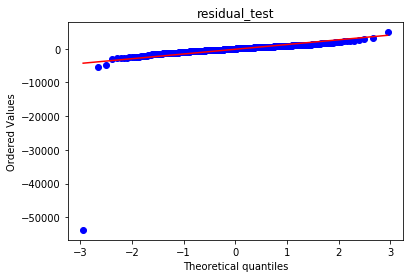

In [56]:
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()

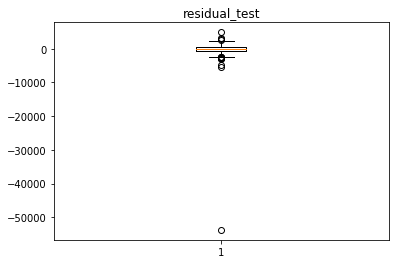

In [57]:
plt.figure()
plt.boxplot(residual_test)
plt.title('residual_test')
plt.show()

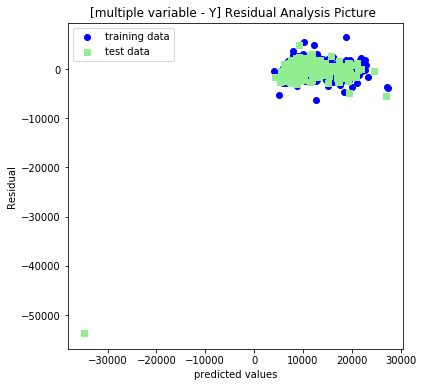

In [58]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_train, residual_train , c = 'blue', marker = 'o', label = 'training data')
plt.scatter(y_pred_test, residual_test , c = 'lightgreen', marker = 's', label = 'test data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


In [60]:
############### Feature selection: backward elimination
# ref: https://github.com/chekoduadarsh/Backward-Elimination-in-Python
def backwardElimination(x, y):
    SL = 0.05
    elimed_Variable = []
    numVars = len(np.array(x)[0])
    for i in range(0, numVars):
        regressor_OLS = smf.OLS(y, np.array(x)).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(np.array(x), j, 1)
                                        
        else:
            elimed_Variable.append(i)
            pass
    regressor_OLS.summary()
    return elimed_Variable

In [61]:
selected_val = backwardElimination(X_train,y_train)

In [66]:
X_train_sel=X_train.iloc[:,selected_val]
X_test_sel=X_test.iloc[:,selected_val]